<a href="https://colab.research.google.com/github/dvjgpta/Twitter_Sentiment_Analysis/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA LOADING

In [2]:
import zipfile
import os
import pandas as pd

data= pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
df= data.copy()
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df[['target', 'text']]
df['target'] = df['target'].map({0: 0, 4: 1})  # Map 0 to negative (0) and 4 to positive (1)
print(df)

         target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       1  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       1  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       1  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       1  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       1  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww

In [3]:
original_data=data.copy()
original_data

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


DATA CLEANING
#removing @username and any word less than 3 letters, links punctuation,exclaimation marks

In [4]:
import re
#removing @username and any word less than 3 letters, links punctuation,exclaimation marks
#df[['text','target']]

def clean_test(text):
    text=re.sub(r'@\w+','',text) #remove @username  #w+ small w means a-zA-Z0-9_ and capital W means opp to this
    text=re.sub(r'http\S+','',text) #remove links #\S+ means non space characters and small s means space characters
    text=re.sub(r'[^A-Za-z\s]','',text) #remove punctuation and numbers #^ means not
    text=re.sub(r'\s+',' ',text) #remove extra spaces
    text=re.sub(r'\b\w{1,3}\b','',text) #remove words with 1 or 2 letters #\b means word boundary
    text=text.strip() #remove leading and trailing spaces
    text=text.lower() #convert to lowercase
    return text

df['cleaned_text']=df['text'].apply(clean_test)
df[['text','cleaned_text','target']]



,text,cleaned_text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda david carr third,0
1,is upset that he can't update his Facebook by ...,upset that cant update facebook texting m...,0
2,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest ...,0
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire,0
4,"@nationwideclass no, it's not behaving at all....",behaving here because cant over there,0
...,...,...,...
1599995,Just woke up. Having no school is the best fee...,just woke having school best feeling ever,1
1599996,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom very cool hear walt interviews,1
1599997,Are you ready for your MoJo Makeover? Ask me f...,ready your mojo makeover details,1
1599998,Happy 38th Birthday to my boo of alll time!!! ...,happy birthday alll time tupac amaru shakur,1


In [5]:
df.isnull().sum() #counting the n8mber of empty white rows

,0
target,0
ids,0
date,0
flag,0
user,0
text,0
cleaned_text,0


In [6]:
#to know the distribution of target variable
df['target'].value_counts()

,count
target,
0,800000
1,800000


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [9]:
import nltk
from nltk import PorterStemmer

ps=PorterStemmer() # ps is a variable to load the instance of the class PorterStemmer

def stemming(text):
    stemmed_text=text.split() #splitting the text into words
    stemmed_text=[ps.stem(word) for word in stemmed_text if not word in stopwords.words('english')] #stemming the words and removing stopwords
    stemmed_text=' '.join(stemmed_text) #joining the words back into a sentence
    return stemmed_text

df['stemmed_text']=df['cleaned_text'].apply(stemming)
df[['target','cleaned_text','stemmed_text']]


,target,cleaned_text,stemmed_text
0,0,awww thats bummer shoulda david carr third,awww that bummer shoulda david carr third
1,0,upset that cant update facebook texting m...,upset cant updat facebook text might result sc...
2,0,dived many times ball managed save rest ...,dive mani time ball manag save rest bound
3,0,whole body feels itchy like fire,whole bodi feel itchi like fire
4,0,behaving here because cant over there,behav cant
...,...,...,...
1599995,1,just woke having school best feeling ever,woke school best feel ever
1599996,1,thewdbcom very cool hear walt interviews,thewdbcom cool hear walt interview
1599997,1,ready your mojo makeover details,readi mojo makeov detail
1599998,1,happy birthday alll time tupac amaru shakur,happi birthday alll time tupac amaru shakur


In [10]:
X=df['stemmed_text'].values
y=df['target'].values

In [11]:
print(X)

['awww that bummer shoulda david carr third'
 'upset cant updat facebook text might result school today also blah'
 'dive mani time ball manag save rest bound' ...
 'readi mojo makeov detail' 'happi birthday alll time tupac amaru shakur'
 'happi charitytuesday']


In [12]:
print(y)

[0 0 0 ... 1 1 1]


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1280000,) (320000,) (1280000,) (320000,)


In [14]:
vectorizer=TfidfVectorizer()

X_train=vectorizer.fit_transform(X_train) #fit the vectorizer to the training data and transform the training data into a matrix of tf-idf features
X_test=vectorizer.transform(X_test) #transform the test data into a matrix of tf-idf features

#"love" appears once in this tweet → TF = 1/4 = 0.25

#"love" appears in 20,000 tweets → IDF = log(1,000,000 / (1 + 20,000)) ≈ 3.91

#Larger values → word is important in this document but rare in others.

#Smaller values → word is common across many tweets → less important.

In [15]:
print(X_train,X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7190212 stored elements and shape (1280000, 306516)>
  Coords	Values
  (0, 261073)	0.21201185215118915
  (0, 166919)	0.22688426567323733
  (0, 83726)	0.2121679855037442
  (0, 235281)	0.535236529930687
  (0, 18649)	0.28378366158278223
  (0, 63054)	0.4900619520434959
  (0, 5355)	0.3439775908672276
  (0, 99016)	0.18521217763604095
  (0, 135013)	0.31426595473716035
  (1, 163141)	1.0
  (2, 83726)	0.21307236766998405
  (2, 246443)	0.25326490739803414
  (2, 242802)	0.33493791285790603
  (2, 251431)	0.5198366707548401
  (2, 62055)	0.5630132479722295
  (2, 279876)	0.2873200913264844
  (2, 173032)	0.26030346911915975
  (2, 263487)	0.2018634062367877
  (3, 255185)	0.5134548827846191
  (3, 8285)	0.5316629626948683
  (3, 32627)	0.6735715087822137
  (4, 144141)	0.2663196282203859
  (4, 241899)	0.5244216591192001
  (4, 304406)	0.3199221951019631
  (4, 187217)	0.3170396799810324
  :	:
  (1279996, 304164)	0.3252322147884428
  (1279996, 10761

Training Model

In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
X_train_pred=model.predict(X_train)
train_acc=accuracy_score(y_train,X_train_pred)
print("Training accuracy:",train_acc)



Training accuracy: 0.77036953125


In [18]:
X_test_pred=model.predict(X_test)
test_acc=accuracy_score(y_test,X_test_pred)
print("Testing accuracy:",test_acc)

# if training accuracy is high and testing accuracy is low then the model is overfitting
# if both training and testing accuracy is low then the model is underfitting
# if both training and testing accuracy is high then the model is good

Testing accuracy: 0.76119375


Saving the model draft 1

In [19]:
import pickle

In [20]:
filename='saved_model_draft1.pkl'
pickle.dump(model,open(filename,'wb'))

Using the saved model for future use


In [21]:
#loading the saved model to test
loaded_model=pickle.load(open(filename,'rb'))

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [23]:
nb_train_pred=nb_model.predict(X_train)
nb_train_acc=accuracy_score(y_train,nb_train_pred)
print("Training accuracy for Naive Bayes:",nb_train_acc)

Training accuracy for Naive Bayes: 0.791253125


In [24]:
nb_test_pred=nb_model.predict(X_test)
nb_test_acc=accuracy_score(y_test,nb_test_pred)
print("Testing accuracy of Naive Bayes:",nb_test_acc)

Testing accuracy of Naive Bayes: 0.745978125


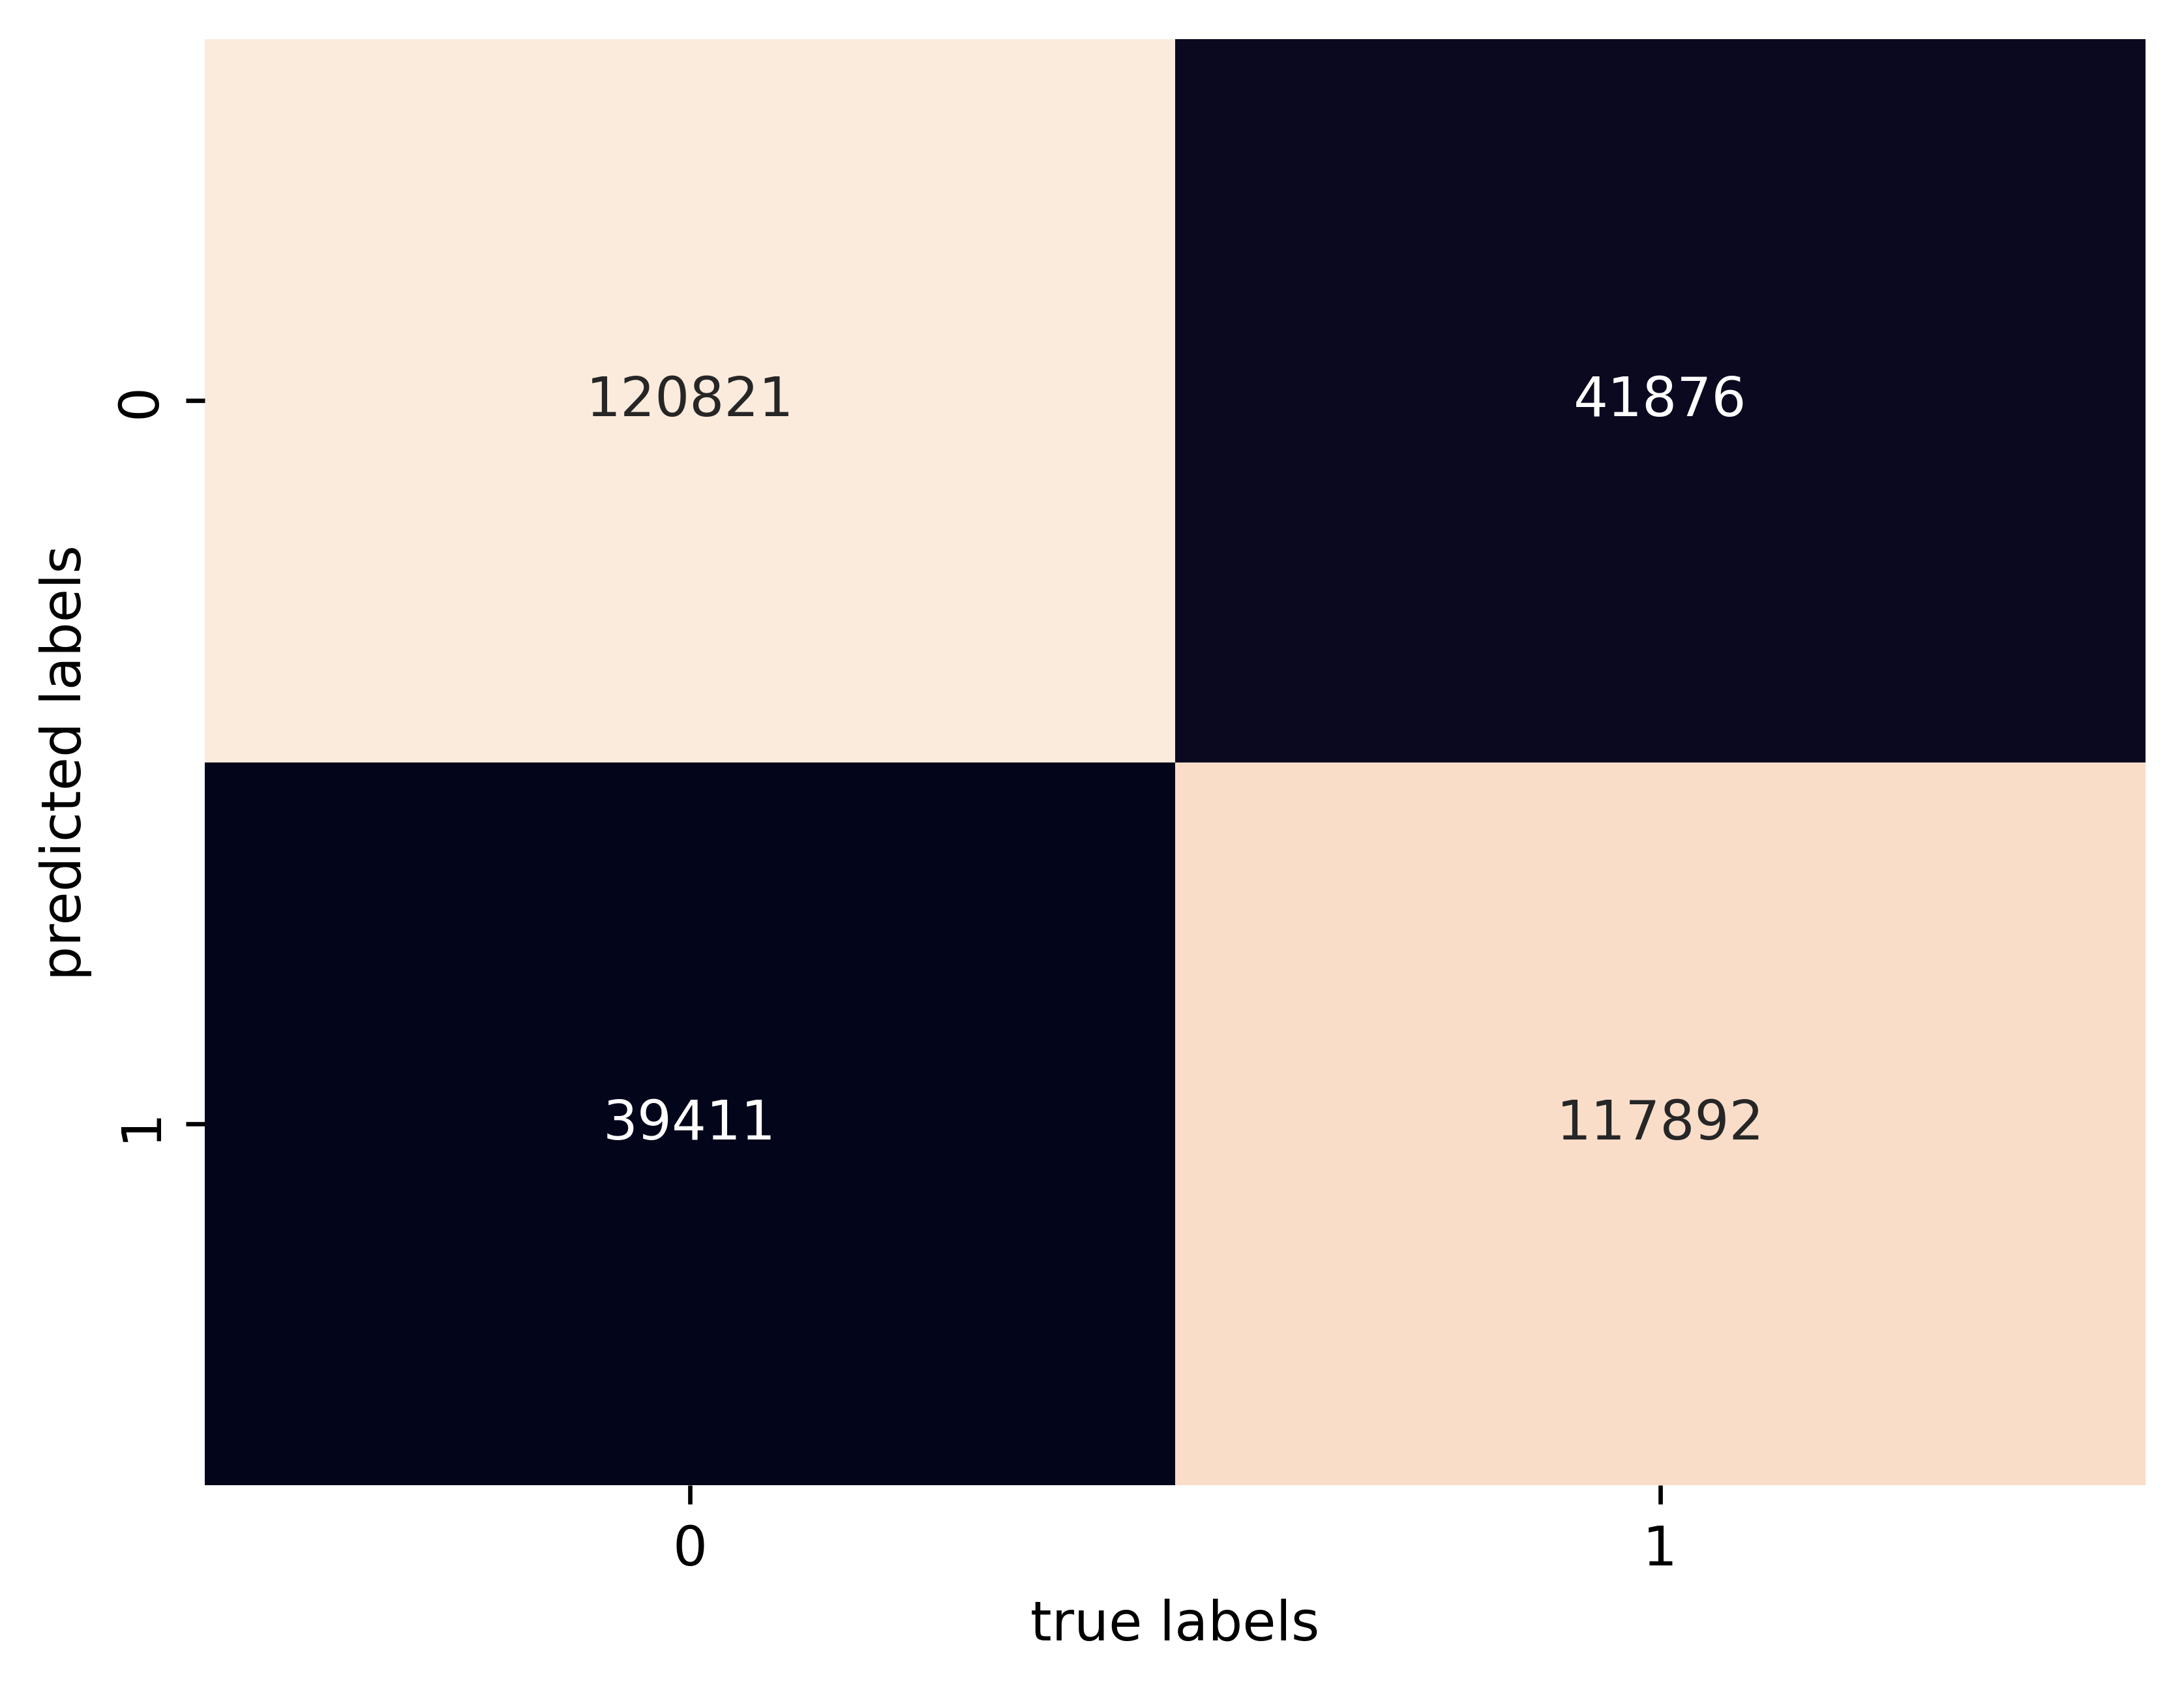

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(dpi=600)
mat=confusion_matrix(y_test,nb_test_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true labels')
plt.ylabel('predicted labels')
plt.show()

In [26]:
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75    160232
           1       0.75      0.74      0.74    159768

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



# Task
Improve the accuracy of the Naive Bayes model.

## Analyze model performance

### Subtask:
Review the current model's performance metrics (accuracy, precision, recall, F1-score) and the confusion matrix to understand where the model is making errors.


## Hyperparameter tuning

### Subtask:
Experiment with different hyperparameters of the Multinomial Naive Bayes model to find the optimal settings.


**Reasoning**:
Experiment with different hyperparameters of the Multinomial Naive Bayes model to find the optimal settings using GridSearchCV.



In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

grid_search = GridSearchCV(MultinomialNB(), param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best hyperparameters: {'alpha': 10.0}
Best cross-validation accuracy: 0.750375


## Hyperparameter tuning

### Subtask:
Retrying Hyperparameter tuning to find the optimal hyperparameters for the Multinomial Naive Bayes model using a wider range of alpha values.


**Reasoning**:
Retrying hyperparameter tuning for the Multinomial Naive Bayes model with a wider range of alpha values to find the optimal hyperparameters.



In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]}

grid_search = GridSearchCV(MultinomialNB(), param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best hyperparameters: {'alpha': 10.0}
Best cross-validation accuracy: 0.750375


## Explore other models

### Subtask:
Consider training other classification models (e.g., Support Vector Machines, Random Forests) to see if they perform better on this dataset.


**Reasoning**:
Import the RandomForestClassifier and train a model with default parameters.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=41)
rf_model.fit(X_train, y_train)